In [93]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


# for custom sort
from pandas.api.types import CategoricalDtype
# to fetch US holiday details
import holidays


In [94]:
df_cab = pd.read_csv('DataSets-main/Cab_Data.csv')
df_city = pd.read_csv('DataSets-main/City.csv')
df_cust = pd.read_csv('DataSets-main/Customer_ID.csv')
df_txn = pd.read_csv('DataSets-main/Transaction_ID.csv')

# Cab Data

In [214]:
print(df_cab.shape)
df_cab.head()

(359392, 7)


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,1/8/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,1/6/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,1/2/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,1/7/2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,1/3/2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [216]:
df_cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  object 
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 19.2+ MB


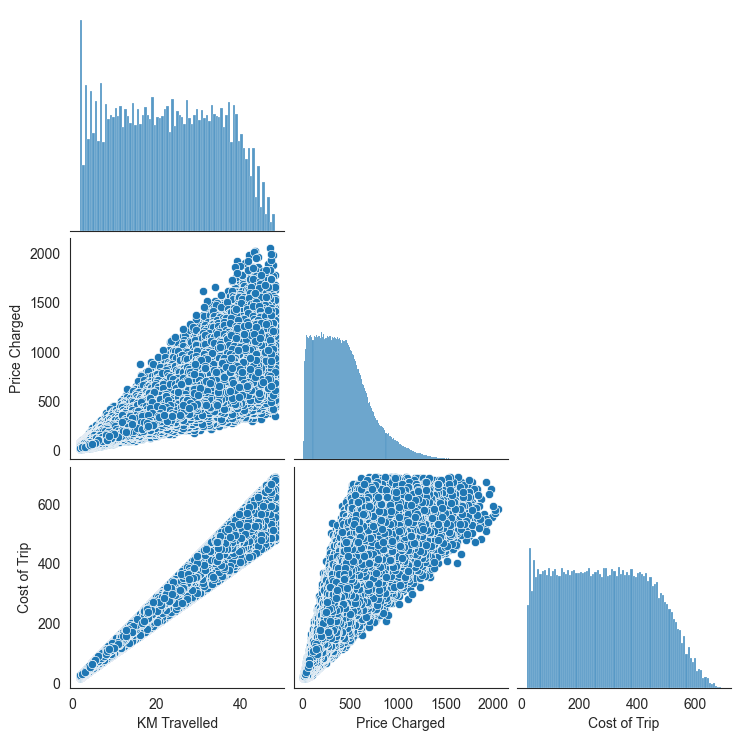

In [268]:
sns.pairplot(df_cab[['KM Travelled', 'Price Charged', 'Cost of Trip']], corner= True)
plt.show()

* We observe that there is high linear relationship between these columns i.e. 'KM Travelled', 'Price Charged', 'Cost of Trip', which kind of makes sense.
* Additionally the price charged is right skewed

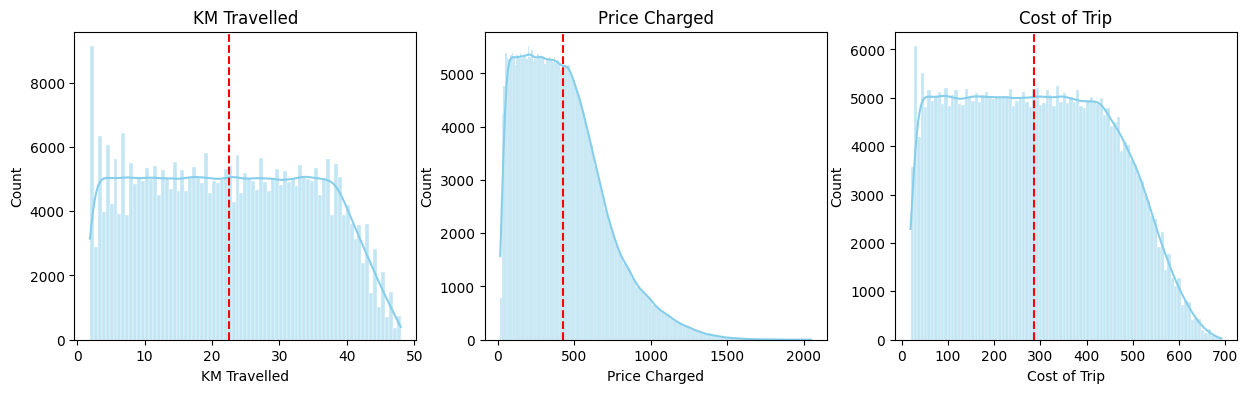

In [247]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for i, column in enumerate(['KM Travelled', 'Price Charged', 'Cost of Trip']):
    sns.histplot(df_cab[column], ax=axes[i], kde = True, color = 'skyblue', edgecolor='white')
    mean = df_cab[column].mean()
    axes[i].axvline(mean, color='red', linestyle='--')
    axes[i].set_title(column)
plt.show()

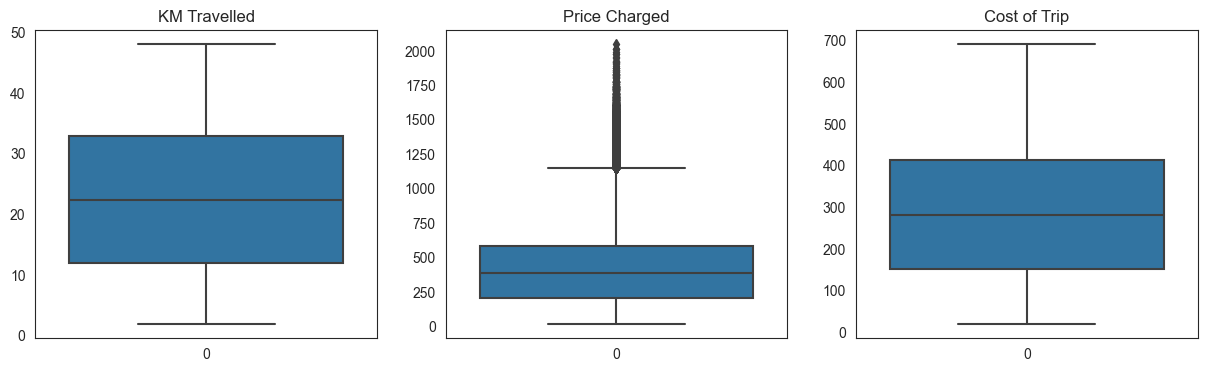

In [269]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for i, column in enumerate(['KM Travelled', 'Price Charged', 'Cost of Trip']):
    sns.boxplot(df_cab[column], ax=axes[i])
    axes[i].set_title(column)
plt.show()

* Here we observe that the column 'Price Charged' has potential number of outliers.

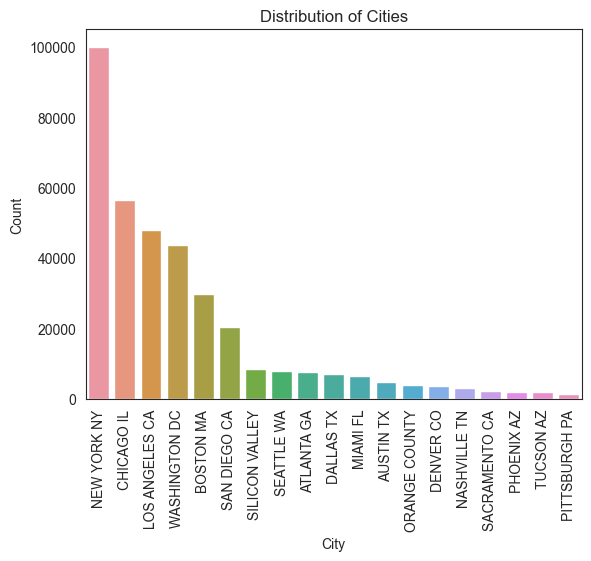

In [283]:
sns.countplot(data=df_cab, x='City', order=df_cab['City'].value_counts().index)
# Set the plot title and axes labels
plt.title('Distribution of Cities')
plt.xlabel('City')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

* NY seems to be dominating in terms of Yellow and Pink Cabs rides

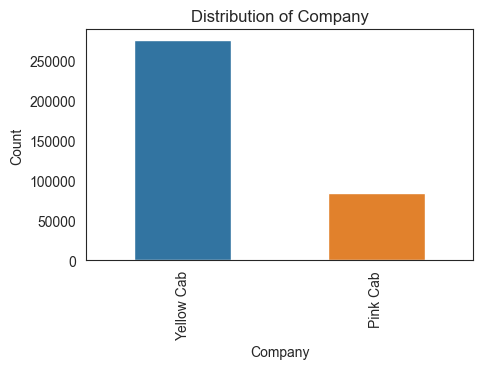

In [280]:
plt.figure(figsize=(5,3))
sns.countplot(data=df_cab, x='Company', order=df_cab['Company'].value_counts().index, width=.5)
# Set the plot title and axes labels
plt.title('Distribution of Company')
plt.xlabel('Company')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

* Seems like we have imbalance in the counts of observations for Pink and Yellow Cab Companies

# City Data

In [285]:
print(df_city.shape)
df_city.head()

(20, 3)


,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [289]:
df_city['Users']

0      302,149 
1      164,468 
2      144,132 
3       17,675 
4       27,247 
5       12,994 
6       69,995 
7        6,133 
8       22,157 
9       24,701 
10      12,421 
11      14,978 
12      25,063 
13       5,712 
14     213,609 
15       7,044 
16       3,643 
17     127,001 
18       9,270 
19      80,021 
Name: Users, dtype: object

In [286]:
df_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [294]:
df_city['Users'] = df_city['Users'].str.replace(',', '').astype(int)
df_city['Population'] = df_city['Population'].str.replace(',', '').astype(int)

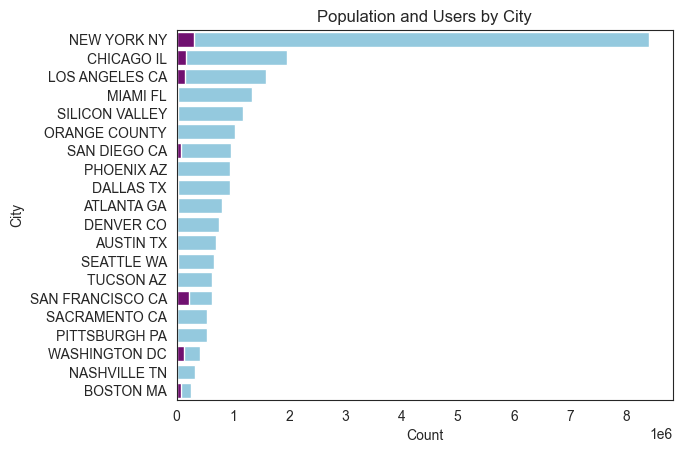

In [302]:
# Create a bar plot of population and users for each city
sns.barplot(x='Population', y='City', data=df_city, color='skyblue', label='Population')
sns.barplot(x='Users', y='City', data=df_city, color='purple', label='Users')

# Set the plot title and axes labels
plt.title('Population and Users by City')
plt.xlabel('Count')
plt.ylabel('City')

plt.show()

* The population of NY is way to high as compared to the other cities, although there seems to be very low fraction of those population prefer Cabs, except the San Francisco CA and Washinton DC.

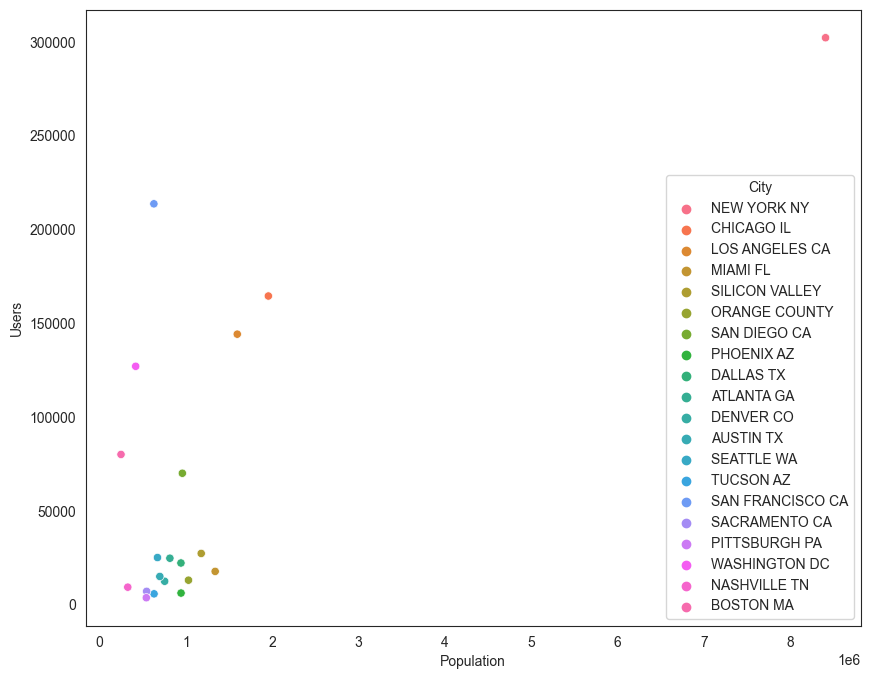

In [311]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Population', y='Users', data=df_city, color='skyblue', hue='City')
plt.show()

* There is a linear correlation between the population and users, but to an extent, there are few cities with high population but the users are not high enough, such as Miami FL, Silicon Valley etc may be people dont prefer cabs over there

# Cutomer ID data

In [97]:
print(df_cust.shape)
df_cust.head()

(49171, 4)


,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [218]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


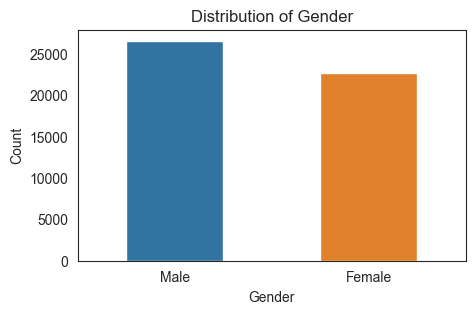

In [328]:
plt.figure(figsize=(5,3))
sns.countplot(data=df_cust, x='Gender', order=df_cust['Gender'].value_counts().index, width=.5)
# Set the plot title and axes labels
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()

* This seems to be a pretty even distribution between male and female customers

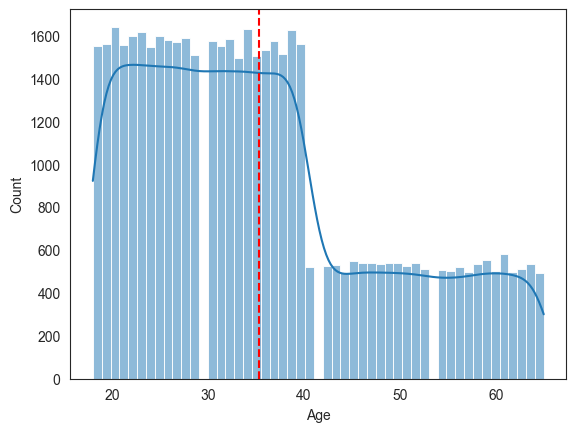

In [319]:
sns.histplot(df_cust['Age'], kde = True)
mean = df_cust['Age'].mean()
plt.axvline(mean, color='red', linestyle='--')
plt.show()

* Majority of the users are between the age of 18-40
* The avg age of the users is around 35

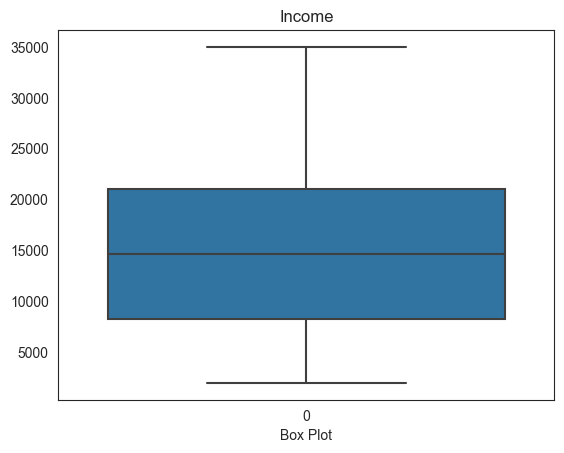

In [323]:
sns.boxplot(df_cust['Income (USD/Month)'])
plt.title('Income')
plt.show()

* There are no outliers in the Income of the users, the mean is at 15000

# Transaction ID data

In [98]:
print(df_txn.shape)
df_txn.head()

(440098, 3)


,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [219]:
df_txn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


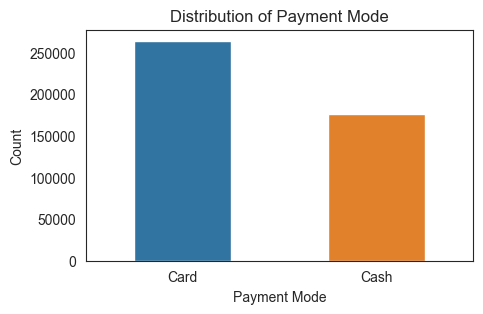

In [329]:
plt.figure(figsize=(5,3))
sns.countplot(data=df_txn, x='Payment_Mode', order=df_txn['Payment_Mode'].value_counts().index, width=.5)
# Set the plot title and axes labels
plt.title('Distribution of Payment Mode')
plt.xlabel('Payment Mode')
plt.ylabel('Count')

plt.show()

* Majority of the users prefer card for the payment.

# Merge All Data

In [99]:
df_cust_tax = pd.merge(df_cust, df_txn, on = 'Customer ID')

In [100]:
df_cust_tax

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode
0,29290,Male,28,10813,10000011,Card
1,29290,Male,28,10813,10351127,Cash
2,29290,Male,28,10813,10412921,Card
3,27703,Male,27,9237,10000012,Card
4,27703,Male,27,9237,10320494,Card
...,...,...,...,...,...,...
440093,12490,Male,33,18713,10439799,Cash
440094,14971,Male,30,15346,10439820,Card
440095,41414,Male,38,3960,10439838,Card
440096,41677,Male,23,19454,10439840,Cash


In [101]:
df_city_cab = pd.merge(df_city, df_cab, on = 'City')

In [102]:
df_city_cab

,City,Population,Users,Transaction ID,Date of Travel,Company,KM Travelled,Price Charged,Cost of Trip
0,NEW YORK NY,"8,405,837","302,149",10000139,1/8/2016,Pink Cab,17.85,242.90,198.1350
1,NEW YORK NY,"8,405,837","302,149",10000140,1/9/2016,Pink Cab,25.30,407.21,255.5300
2,NEW YORK NY,"8,405,837","302,149",10000141,1/6/2016,Pink Cab,16.32,236.41,186.0480
3,NEW YORK NY,"8,405,837","302,149",10000142,1/4/2016,Pink Cab,12.43,194.61,144.1880
4,NEW YORK NY,"8,405,837","302,149",10000143,1/9/2016,Pink Cab,29.70,434.57,350.4600
...,...,...,...,...,...,...,...,...,...
359387,BOSTON MA,"248,968","80,021",10437872,1/4/2018,Yellow Cab,1.96,26.23,25.1664
359388,BOSTON MA,"248,968","80,021",10437873,1/5/2018,Yellow Cab,23.52,380.22,338.6880
359389,BOSTON MA,"248,968","80,021",10437874,1/6/2018,Yellow Cab,29.10,393.33,391.1040
359390,BOSTON MA,"248,968","80,021",10437875,1/8/2018,Yellow Cab,3.33,42.31,46.7532


In [103]:
df = pd.merge(df_city_cab, df_cust_tax, on = 'Transaction ID')

In [104]:
print(df.shape)
df.head()

(359392, 14)


,City,Population,Users,Transaction ID,Date of Travel,Company,KM Travelled,Price Charged,Cost of Trip,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode
0,NEW YORK NY,"8,405,837","302,149",10000139,1/8/2016,Pink Cab,17.85,242.90,198.135,2416,Male,28,21399,Cash
1,NEW YORK NY,"8,405,837","302,149",10000140,1/9/2016,Pink Cab,25.30,407.21,255.530,2060,Male,18,8149,Card
2,NEW YORK NY,"8,405,837","302,149",10000141,1/6/2016,Pink Cab,16.32,236.41,186.048,1451,Male,35,23989,Card
3,NEW YORK NY,"8,405,837","302,149",10000142,1/4/2016,Pink Cab,12.43,194.61,144.188,1609,Male,30,23036,Card
4,NEW YORK NY,"8,405,837","302,149",10000143,1/9/2016,Pink Cab,29.70,434.57,350.460,2927,Male,33,14520,Cash


In [107]:
# check missing values and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   City                359392 non-null  object 
 1   Population          359392 non-null  object 
 2   Users               359392 non-null  object 
 3   Transaction ID      359392 non-null  int64  
 4   Date of Travel      359392 non-null  object 
 5   Company             359392 non-null  object 
 6   KM Travelled        359392 non-null  float64
 7   Price Charged       359392 non-null  float64
 8   Cost of Trip        359392 non-null  float64
 9   Customer ID         359392 non-null  int64  
 10  Gender              359392 non-null  object 
 11  Age                 359392 non-null  int64  
 12  Income (USD/Month)  359392 non-null  int64  
 13  Payment_Mode        359392 non-null  object 
dtypes: float64(3), int64(4), object(7)
memory usage: 41.1+ MB


In [108]:
# check dupicates
df.duplicated().sum()

0

# Preprocessing

In [109]:

df['Users'] = df['Users'].str.replace(',', '').astype(int)
df['Population'] = df['Population'].str.replace(',', '').astype(int)

In [ ]:
# generate Holiday variable based on US Holidays
us_holidays = holidays.US()
def is_US_holiday(date):
    return date in us_holidays
df['Holiday'] = df['Date of Travel'].apply(is_US_holiday)

In [ ]:
# extract the day of the week
df['Date'] = pd.to_datetime(df['Date of Travel'])
df['Day_of_week'] = df['Date'].apply(lambda x: x.strftime('%A'))
df.drop(['Date'], axis = 1, inplace= True)

In [ ]:
# sort based on the order provided
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_dtype = CategoricalDtype(categories= weekday_order, ordered = True)
df['Day_of_week'] = df['Day_of_week'].astype(cat_dtype)

In [ ]:
# lets split the date into 3 columns- day, month, year
df[['Month', 'Day', 'Year']] = df['Date of Travel'].str.split('/', expand=True).astype(int)
df.drop(['Date of Travel'], axis = 1, inplace= True)

In [194]:
# add the profit column (Cost of Trip - Price Charged)
df['Profit'] = df['Price Charged'] - df['Cost of Trip']

In [195]:
df.head()

,City,Population,Users,Transaction ID,Date of Travel,Company,KM Travelled,Price Charged,Cost of Trip,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,Age_Interval,Income_Interval,Profit
0,NEW YORK NY,8405837,302149,10000139,1/8/2016,Pink Cab,17.85,242.90,198.135,2416,Male,28,21399,Cash,26-33,>21000,44.765
1,NEW YORK NY,8405837,302149,10000140,1/9/2016,Pink Cab,25.30,407.21,255.530,2060,Male,18,8149,Card,18-25,<8500,151.680
2,NEW YORK NY,8405837,302149,10000141,1/6/2016,Pink Cab,16.32,236.41,186.048,1451,Male,35,23989,Card,34-42,>21000,50.362
3,NEW YORK NY,8405837,302149,10000142,1/4/2016,Pink Cab,12.43,194.61,144.188,1609,Male,30,23036,Card,26-33,>21000,50.422
4,NEW YORK NY,8405837,302149,10000143,1/9/2016,Pink Cab,29.70,434.57,350.460,2927,Male,33,14520,Cash,26-33,8500-15000,84.110


# EDA

In [ ]:
colors = {'Pink Cab': 'deeppink', 'Yellow Cab': 'darkgoldenrod'}

# Seasonal Users

## Daily

In [ ]:
df_ = df.groupby(['Day', 'Company'])['Users'].count().reset_index()
df_.rename(columns = {'Users':'Rides'}, inplace =  True)

In [ ]:
df_.head()

,Day,Company,Rides
0,1,Pink Cab,2875
1,1,Yellow Cab,9079
2,2,Pink Cab,2664
3,2,Yellow Cab,8702
4,3,Pink Cab,3124


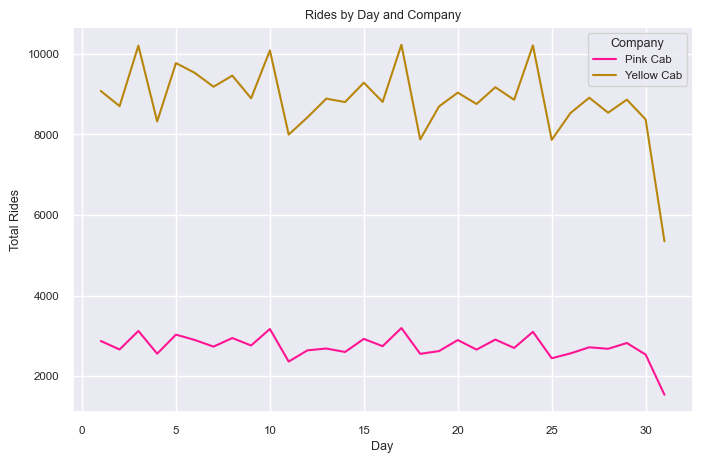

In [ ]:
plt.figure(figsize= (8, 5))
sns.set(font_scale=.75)

sns.lineplot(df_, x = 'Day', y = 'Rides', hue = 'Company', palette= colors)
plt.xlabel('Day')
plt.ylabel('Total Rides')
plt.title('Rides by Day and Company')
plt.show()

## Monthly

In [ ]:
df_ = df.groupby(['Month', 'Company'])['Users'].count().reset_index()
df_.rename(columns = {'Users':'Rides'}, inplace =  True)

In [ ]:
df_.head()

,Month,Company,Rides
0,1,Pink Cab,5057
1,1,Yellow Cab,18117
2,2,Pink Cab,3375
3,2,Yellow Cab,14932
4,3,Pink Cab,4223


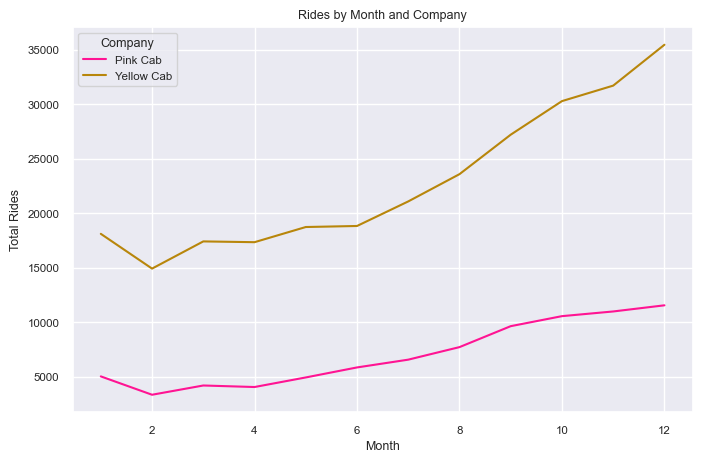

In [ ]:
plt.figure(figsize=(8, 5))
sns.lineplot(df_, x = 'Month', y = 'Rides', hue= 'Company', palette= colors)
plt.xlabel('Month')
plt.ylabel('Total Rides')
plt.title('Rides by Month and Company')
plt.show()

## Yearly

In [ ]:
df_ = df.groupby(['Year', 'Company'])['Users'].count().reset_index()
df_.rename(columns = {'Users':'Rides'}, inplace =  True)

In [ ]:
df_.head()

,Year,Company,Rides
0,2016,Pink Cab,25080
1,2016,Yellow Cab,82239
2,2017,Pink Cab,30321
3,2017,Yellow Cab,98189
4,2018,Pink Cab,29310


<BarContainer object of 3 artists>
<BarContainer object of 3 artists>


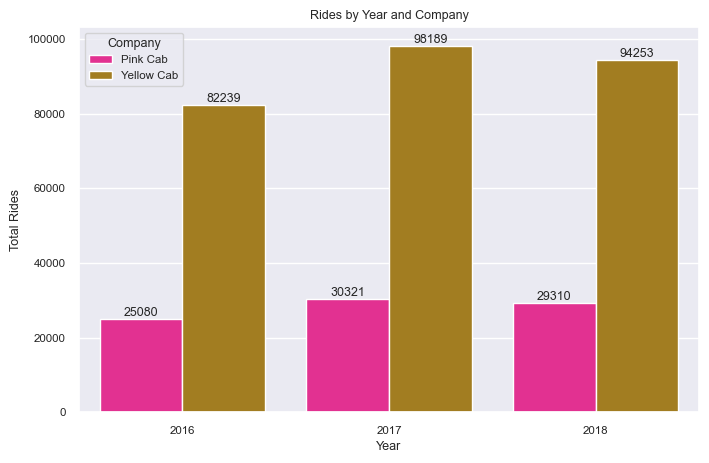

In [ ]:
plt.figure(figsize = (8, 5))
sns.set(font_scale=.75)
ax = sns.barplot(df_, x = 'Year', y = 'Rides', hue = 'Company', palette = colors)
plt.xlabel('Year')
plt.ylabel('Total Rides')
plt.title('Rides by Year and Company')

for container in ax.containers:
    ax.bar_label(container)
plt.show()


## Day of the week

In [ ]:
df_ = df.groupby(['Day_of_week', 'Company'])['Users'].count().reset_index()
df_.rename(columns = {'Users':'Rides'}, inplace =  True)

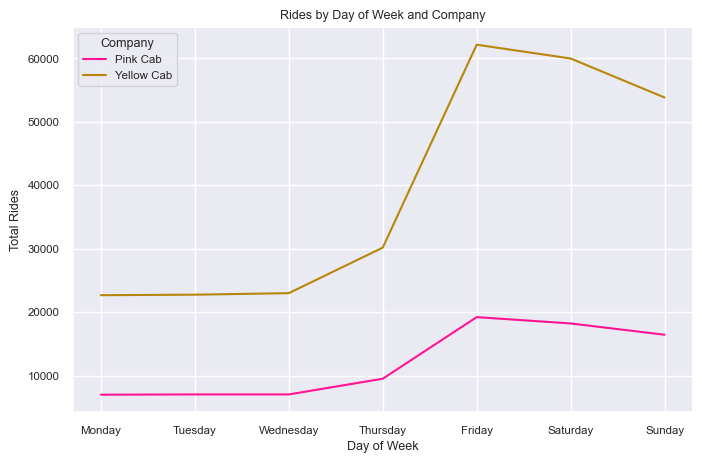

In [ ]:
plt.figure(figsize = (8, 5))
sns.set(font_scale=.75)
sns.lineplot(df_, x = 'Day_of_week', y = 'Rides', hue = 'Company', palette= colors)
plt.xlabel('Day of Week')
plt.ylabel('Total Rides')
plt.title('Rides by Day of Week and Company')
plt.show()

## Holidays

In [ ]:
df_ = df.groupby(['Holiday', 'Company'])['Users'].count().reset_index()
df_.rename(columns = {'Users':'Rides'}, inplace =  True)

In [ ]:
df_.head()

,Holiday,Company,Rides
0,False,Pink Cab,82321
1,False,Yellow Cab,267667
2,True,Pink Cab,2390
3,True,Yellow Cab,7014


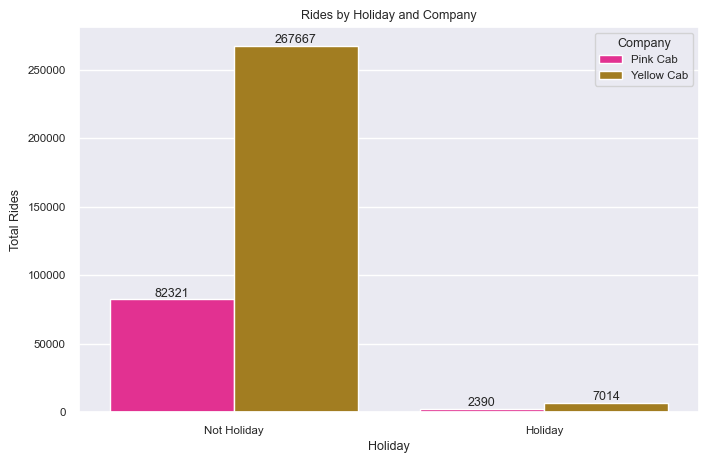

In [ ]:
plt.figure(figsize = (8, 5))
sns.set(font_scale=.75)
ax = sns.barplot(df_, x = 'Holiday', y = 'Rides', hue = 'Company', palette= colors)
plt.xlabel('Holiday')
plt.ylabel('Total Rides')
plt.xticks([False, True], ['Not Holiday', 'Holiday'])
plt.title('Rides by Holiday and Company')

for container in ax.containers:
    ax.bar_label(container)
plt.show()

# Profit Analysis

## Overall Profit

In [ ]:
df_ = df.groupby(['Company'])['Profit'].sum().reset_index()

In [ ]:
df_['Profit_million'] = df_['Profit'] / 10000000
df_.drop(['Profit'], axis = 1, inplace= True)

In [ ]:
df_

,Company,Profit_million
0,Pink Cab,0.530733
1,Yellow Cab,4.402037


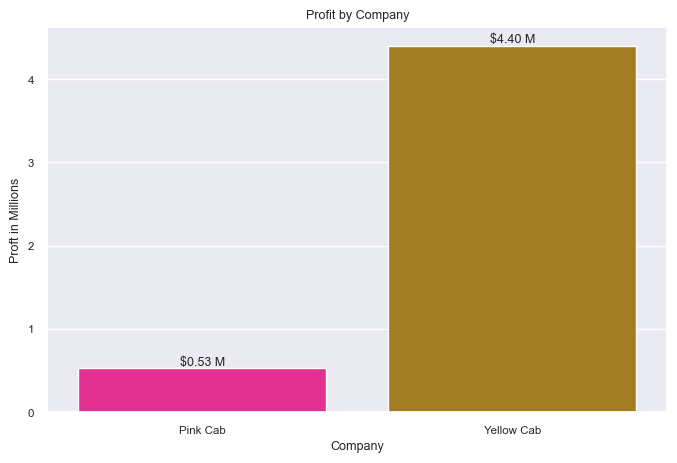

In [ ]:
plt.figure(figsize = (8, 5))
sns.set(font_scale=.75)
ax = sns.barplot(df_, x = 'Company', y = 'Profit_million', palette= colors)
plt.xlabel('Company')
plt.ylabel('Proft in Millions')
plt.title('Profit by Company')

for container in ax.containers:
    ax.bar_label(container, fmt = '$%.2f M')
plt.show()

## Profit per ride

In [ ]:
df_ = df.groupby(['Company']).agg({'Users':'count', 'Profit': 'sum'}).reset_index()
df_.rename(columns = {'Users':'Rides'}, inplace =  True)

In [ ]:
df_['Profit per Ride'] = df_['Profit'] / df_['Rides']

In [ ]:
df_

,Company,Rides,Profit,Profit per User,Profit per Ride
0,Pink Cab,84711,5.307328e+06,62.652174,62.652174
1,Yellow Cab,274681,4.402037e+07,160.259986,160.259986


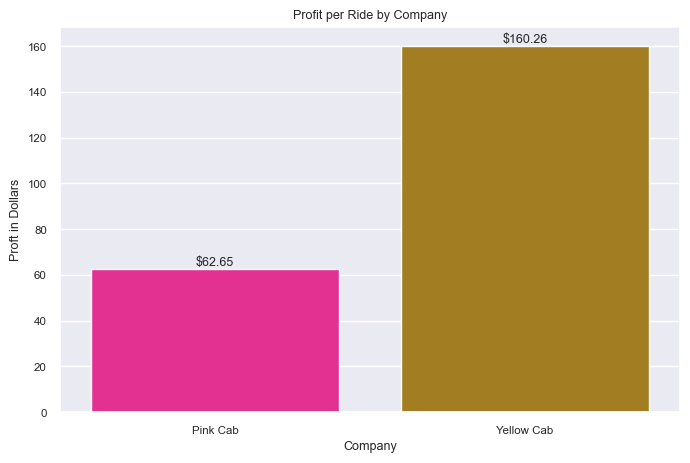

In [ ]:
plt.figure(figsize = (8, 5))
sns.set(font_scale=.75)
ax = sns.barplot(df_, x = 'Company', y = 'Profit per Ride', palette= colors)
plt.xlabel('Company')
plt.ylabel('Proft in Dollars')
plt.title('Profit per Ride by Company')

for container in ax.containers:
    ax.bar_label(container, fmt = '$%.2f')
plt.show()

## Profit per month

In [ ]:
df_ = df.groupby(['Month', 'Company'])['Profit'].sum().reset_index()

In [ ]:
df_['Profit_million'] = df_['Profit'] / 1000000

In [ ]:
df_.head()

,Month,Company,Profit,Profit_million
0,1,Pink Cab,3.880546e+05,0.388055
1,1,Yellow Cab,3.358436e+06,3.358436
2,2,Pink Cab,2.520413e+05,0.252041
3,2,Yellow Cab,2.975979e+06,2.975979
4,3,Pink Cab,2.990966e+05,0.299097


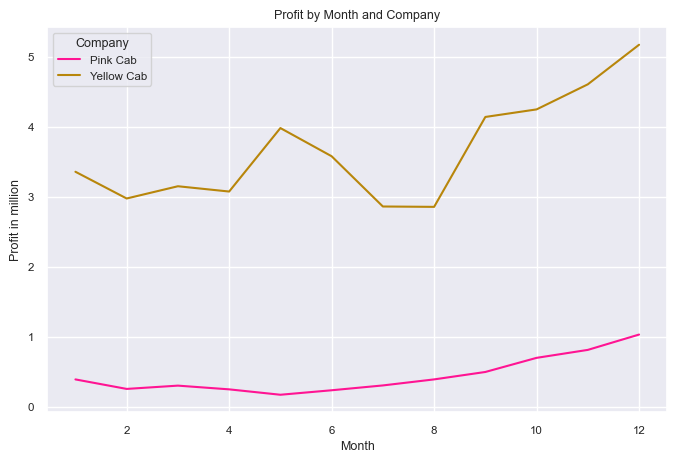

In [ ]:
plt.figure(figsize=(8, 5))
sns.lineplot(df_, x = 'Month', y = 'Profit_million', hue= 'Company', palette= colors)
plt.xlabel('Month')
plt.ylabel('Profit in million ($)')
plt.title('Profit by Month and Company')
plt.show()

## Profit per Year

In [ ]:
df_ = df.groupby(['Year', 'Company'])['Profit'].sum().reset_index()

In [ ]:
df_['Profit_million'] = df_['Profit'] / 1000000

In [ ]:
df_.head()

,Year,Company,Profit,Profit_million
0,2016,Pink Cab,1.713511e+06,1.713511
1,2016,Yellow Cab,1.392700e+07,13.926995
2,2017,Pink Cab,2.033655e+06,2.033655
3,2017,Yellow Cab,1.657598e+07,16.575978
4,2018,Pink Cab,1.560162e+06,1.560162


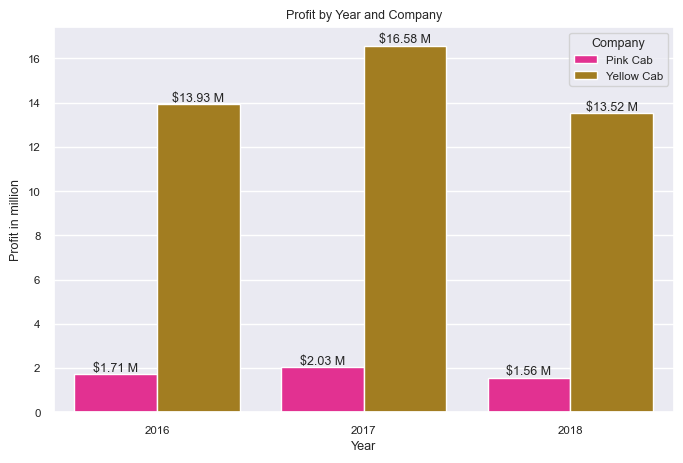

In [ ]:
plt.figure(figsize = (8, 5))
sns.set(font_scale=.75)
ax = sns.barplot(df_, x = 'Year', y = 'Profit_million', hue = 'Company', palette = colors)
plt.xlabel('Year')
plt.ylabel('Profit in million')
plt.title('Profit by Year and Company')

for container in ax.containers:
    ax.bar_label(container, fmt = '$%.2f M')
plt.show()

## Profit in Week Days

In [ ]:
df_ = df.groupby(['Day_of_week', 'Company'])['Profit'].sum().reset_index()

In [ ]:
df_['Profit_million'] = df_['Profit'] / 1000000

In [ ]:
df_.head()

,Day_of_week,Company,Profit,Profit_million
0,Monday,Pink Cab,3.325603e+05,0.332560
1,Monday,Yellow Cab,3.172373e+06,3.172373
2,Tuesday,Pink Cab,3.389255e+05,0.338925
3,Tuesday,Yellow Cab,3.179840e+06,3.179840
4,Wednesday,Pink Cab,3.369643e+05,0.336964


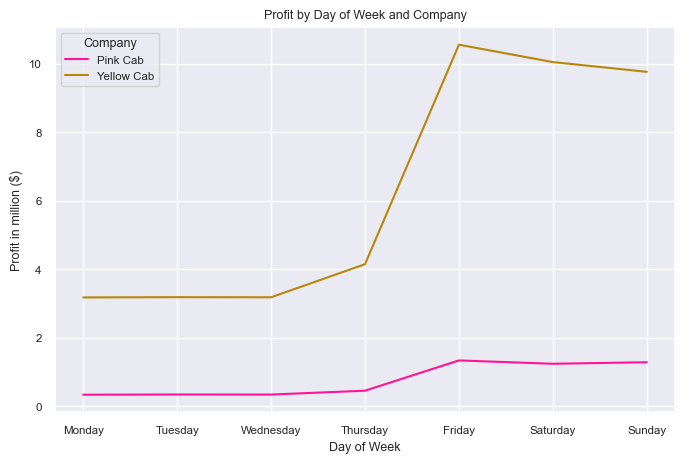

In [ ]:
plt.figure(figsize = (8, 5))
sns.set(font_scale=.75)
sns.lineplot(df_, x = 'Day_of_week', y = 'Profit_million', hue = 'Company', palette= colors)
plt.xlabel('Day of Week')
plt.ylabel('Profit in million ($)')
plt.title('Profit by Day of Week and Company')
plt.show()

## Profit in Holidays

In [ ]:
df_ = df.groupby(['Holiday', 'Company'])['Profit'].sum().reset_index()

In [ ]:
df_['Profit_million'] = df_['Profit'] / 1000000

In [ ]:
df_.head()

,Holiday,Company,Profit,Profit_million
0,False,Pink Cab,5.126128e+06,5.126128
1,False,Yellow Cab,4.295135e+07,42.951346
2,True,Pink Cab,1.812003e+05,0.181200
3,True,Yellow Cab,1.069027e+06,1.069027


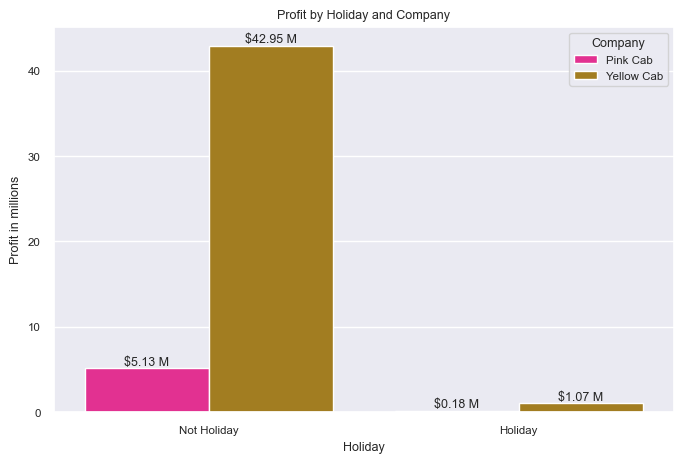

In [ ]:
plt.figure(figsize = (8, 5))
sns.set(font_scale=.75)
ax = sns.barplot(df_, x = 'Holiday', y = 'Profit_million', hue = 'Company', palette= colors)
plt.xlabel('Holiday')
plt.ylabel('Profit in millions')
plt.xticks([False, True], ['Not Holiday', 'Holiday'])
plt.title('Profit by Holiday and Company')

for container in ax.containers:
    ax.bar_label(container, fmt = '$%.2f M')
plt.show()

## Profit per City

In [330]:
df_ = df.groupby(['City', 'Company'])['Profit'].sum().reset_index()

In [331]:
df_['Profit_in_K'] = df_['Profit'] / 1000000
df_.head()

,City,Company,Profit,Profit_in_K
0,ATLANTA GA,Pink Cab,96050.0760,0.096050
1,ATLANTA GA,Yellow Cab,746382.8056,0.746383
2,AUSTIN TX,Pink Cab,147445.2900,0.147445
3,AUSTIN TX,Yellow Cab,379255.7352,0.379256
4,BOSTON MA,Pink Cab,262001.6980,0.262002


In [332]:
df_ = df_.set_index('City')
df_ = df_.pivot_table(index = 'City', columns= 'Company', values='Profit_in_K')
df_.head()

Company,Pink Cab,Yellow Cab
City,,
ATLANTA GA,0.096050,0.746383
AUSTIN TX,0.147445,0.379256
BOSTON MA,0.262002,1.506718
CHICAGO IL,0.318722,3.068591
DALLAS TX,0.024730,1.104003


In [333]:
df_ = df_.sort_values('Pink Cab', ascending= False)
df_

Company,Pink Cab,Yellow Cab
City,,
NEW YORK NY,1.511474,26.451081
LOS ANGELES CA,1.125732,3.285977
SAN DIEGO CA,0.637890,0.949274
SILICON VALLEY,0.340251,0.976455
CHICAGO IL,0.318722,3.068591
BOSTON MA,0.262002,1.506718
WASHINGTON DC,0.193766,3.299104
MIAMI FL,0.162301,0.596000
AUSTIN TX,0.147445,0.379256


# Cab Users per Company per State 

## for all years

In [ ]:
df_ = df.groupby(['City','Users', 'Company'])['Customer ID'].nunique().reset_index()
df_.rename(columns = {'Customer ID':'Cab_Users'}, inplace =  True)
df_.head()

,City,Users,Company,Cab_Users
0,ATLANTA GA,24701,Pink Cab,1322
1,ATLANTA GA,24701,Yellow Cab,2595
2,AUSTIN TX,14978,Pink Cab,1354
3,AUSTIN TX,14978,Yellow Cab,1914
4,BOSTON MA,80021,Pink Cab,2463


In [ ]:
df_['Share %'] = round(df_['Cab_Users'] / df_['Users'] * 100, 1)
df_ = df_.set_index('City')
df_ = df_.pivot_table(index = 'City', columns= 'Company', values='Share %')

In [ ]:
df_.head()

Company,Pink Cab,Yellow Cab
City,,
ATLANTA GA,5.4,10.5
AUSTIN TX,9.0,12.8
BOSTON MA,3.1,3.7
CHICAGO IL,1.7,1.8
DALLAS TX,5.0,11.6


In [ ]:
df_ = df_.sort_values('Pink Cab', ascending= False)

<Figure size 2000x1000 with 0 Axes>

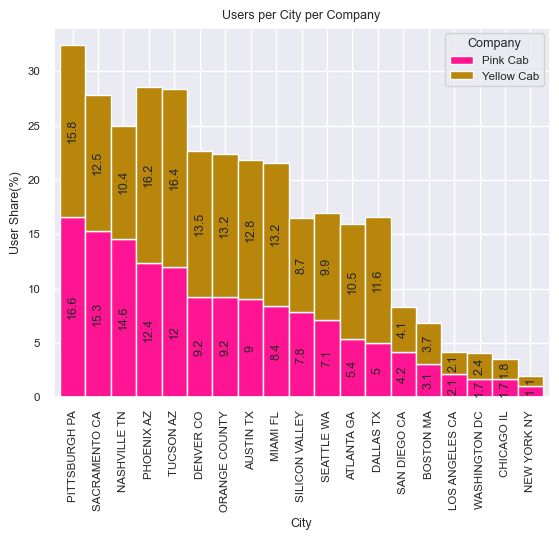

In [ ]:
plt.figure(figsize=(20, 10))
ax = df_.plot(kind='bar', stacked=True, color=colors, width=1)
plt.xlabel('City')
plt.ylabel('User Share (%)')
plt.title('Users per City per Company')

# add values to the bars
for container in ax.containers:
    ax.bar_label(container, label_type='center', rotation=90)

plt.show()

## lets see the profit in top 3 cities

In [ ]:
df_ = df.groupby(['City', 'Company'])['Profit'].sum().reset_index()

In [ ]:
df_ = df_[(df_['City'] == 'PITTSBURGH PA') | (df_['City'] == 'SACRAMENTO CA') | (df_['City'] == 'NASHVILLE TN')]
df_.head()

,City,Company,Profit
16,NASHVILLE TN,Pink Cab,64284.5340
17,NASHVILLE TN,Yellow Cab,85247.6844
24,PITTSBURGH PA,Pink Cab,17107.7380
25,PITTSBURGH PA,Yellow Cab,68058.2188
26,SACRAMENTO CA,Pink Cab,55324.0120


In [ ]:
df_['Profit_in_K'] = df_['Profit'] / 1000
df_

,City,Company,Profit,Profit_in_K
16,NASHVILLE TN,Pink Cab,64284.5340,64.284534
17,NASHVILLE TN,Yellow Cab,85247.6844,85.247684
24,PITTSBURGH PA,Pink Cab,17107.7380,17.107738
25,PITTSBURGH PA,Yellow Cab,68058.2188,68.058219
26,SACRAMENTO CA,Pink Cab,55324.0120,55.324012
27,SACRAMENTO CA,Yellow Cab,62002.1800,62.002180


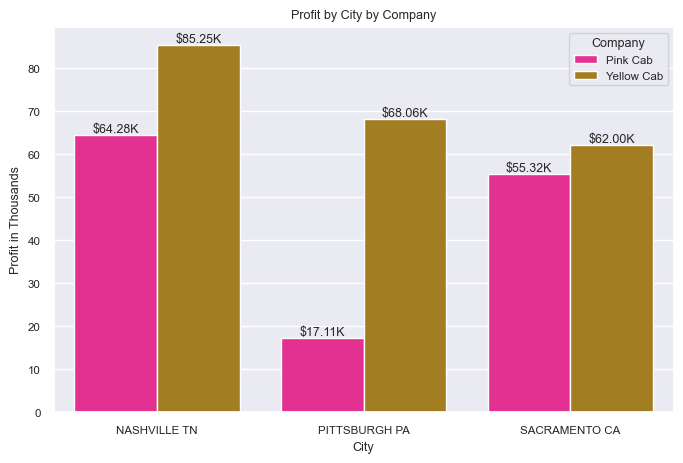

In [ ]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(df_, x = 'City', y = 'Profit_in_K', hue = 'Company', dodge = True, palette = colors)
plt.xlabel('City')
plt.ylabel('Profit in Thousands')
plt.title('Profit by City by Company')

# add values to the bars
for container in ax.containers:
    ax.bar_label(container, fmt = '$%.2fK')

plt.show()

# Travel Distance

## km travelled per ride per company

In [ ]:
df.head()

,City,Population,Users,Transaction ID,Company,KM Travelled,Price Charged,Cost of Trip,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,Holiday,Day_of_week,Month,Day,Year,Profit
0,NEW YORK NY,8405837,302149,10000139,Pink Cab,17.85,242.90,198.135,2416,Male,28,21399,Cash,False,Friday,1,8,2016,44.765
1,NEW YORK NY,8405837,302149,10000140,Pink Cab,25.30,407.21,255.530,2060,Male,18,8149,Card,False,Saturday,1,9,2016,151.680
2,NEW YORK NY,8405837,302149,10000141,Pink Cab,16.32,236.41,186.048,1451,Male,35,23989,Card,False,Wednesday,1,6,2016,50.362
3,NEW YORK NY,8405837,302149,10000142,Pink Cab,12.43,194.61,144.188,1609,Male,30,23036,Card,False,Monday,1,4,2016,50.422
4,NEW YORK NY,8405837,302149,10000143,Pink Cab,29.70,434.57,350.460,2927,Male,33,14520,Cash,False,Saturday,1,9,2016,84.110


In [ ]:
df_ = df.groupby(['Company']).agg({'KM Travelled':'sum', 'Users':'count'}).reset_index()
df_ = df_.rename(columns={'Users':'Rides'})

In [ ]:
df_['KM per Ride'] = df_['KM Travelled'] / df_['Rides']

In [ ]:
df_.head()

,Company,KM Travelled,Rides,KM per Ride
0,Pink Cab,1911073.11,84711,22.559917
1,Yellow Cab,6199417.47,274681,22.569517


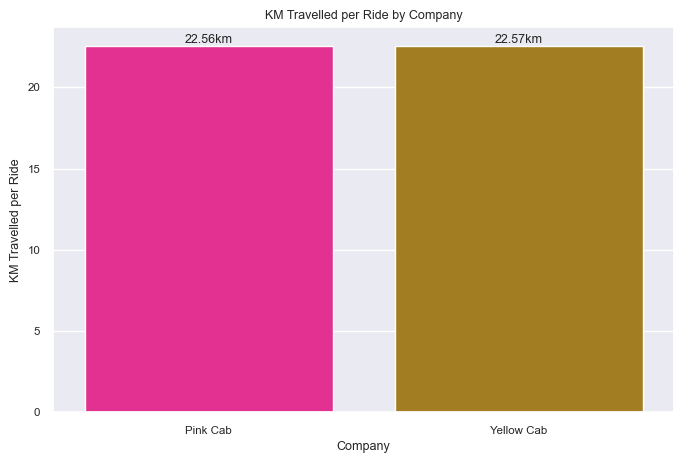

In [ ]:
plt.figure(figsize = (8, 5))
sns.set(font_scale=.75)
ax = sns.barplot(df_, x = 'Company', y = 'KM per Ride', palette= colors)
plt.xlabel('Company')
plt.ylabel('KM Travelled per Ride')
plt.title('KM Travelled per Ride by Company')

for container in ax.containers:
    ax.bar_label(container, fmt = '%.2fkm')
plt.show()

## price charged per ride

### all cities

In [ ]:
df_ = df.groupby(['Company']).agg({'Price Charged' : 'sum', 'Cost of Trip' : 'sum', 'KM Travelled' : 'sum','Users' : 'count'})
df_ = df_.rename(columns={'Users' : 'Rides'})

In [ ]:
df_['Price Charged per Ride'] = df_['Price Charged'] / df_['Rides']
df_['Cost of Trip per Ride'] = df_['Cost of Trip'] / df_['Rides']
df_['Price Charged per KM'] = df_['Price Charged'] / df_['KM Travelled']
df_['Cost of Trip per KM'] = df_['Cost of Trip'] / df_['KM Travelled']
df_.head()

,Price Charged,Cost of Trip,KM Travelled,Rides,Price Charged per Ride,Cost of Trip per Ride,Price Charged per KM,Cost of Trip per KM
Company,,,,,,,,
Pink Cab,2.632825e+07,2.102092e+07,1911073.11,84711,310.800856,248.148682,13.776685,10.999539
Yellow Cab,1.258539e+08,8.183351e+07,6199417.47,274681,458.181990,297.922004,20.300921,13.200194


### city wise

In [ ]:
df_ = df.groupby(['Company', 'City']).agg({'Price Charged' : 'sum', 'Cost of Trip' : 'sum', 'KM Travelled' : 'sum','Users' : 'count'}).reset_index()
df_ = df_.rename(columns={'Users' : 'Rides'})

In [ ]:
df_['Price Charged per Ride'] = df_['Price Charged'] / df_['Rides']
df_['Cost of Trip per Ride'] = df_['Cost of Trip'] / df_['Rides']
df_['Price Charged per KM'] = df_['Price Charged'] / df_['KM Travelled']
df_['Cost of Trip per KM'] = df_['Cost of Trip'] / df_['KM Travelled']
df_.head()

,Company,City,Price Charged,Cost of Trip,KM Travelled,Rides,Price Charged per Ride,Cost of Trip per Ride,Price Charged per KM,Cost of Trip per KM
0,Pink Cab,ATLANTA GA,532355.80,436305.724,39715.17,1762,302.131555,247.619594,13.404344,10.985871
1,Pink Cab,AUSTIN TX,598572.71,451127.420,41038.42,1868,320.435070,241.502901,14.585667,10.992807
2,Pink Cab,BOSTON MA,1558660.02,1296658.322,117933.51,5186,300.551489,250.030529,13.216430,10.994825
3,Pink Cab,CHICAGO IL,2636186.14,2317463.652,210726.13,9361,281.613731,247.565821,12.510011,10.997514
4,Pink Cab,DALLAS TX,358835.40,334105.288,30389.26,1380,260.025652,242.105281,11.807968,10.994190


In [ ]:
df_ = df_.set_index('City')

In [ ]:
df__ = df_.pivot_table(index = 'City', columns= 'Company', values='Price Charged per Ride')
df__ = df__.sort_values('Pink Cab', ascending= False)
df__.head()

Company,Pink Cab,Yellow Cab
City,,
NEW YORK NY,357.074129,604.841911
SILICON VALLEY,340.377008,506.499502
MIAMI FL,326.006309,432.944872
TUCSON AZ,323.213554,366.018224
AUSTIN TX,320.435070,422.248940


<Figure size 2000x1000 with 0 Axes>

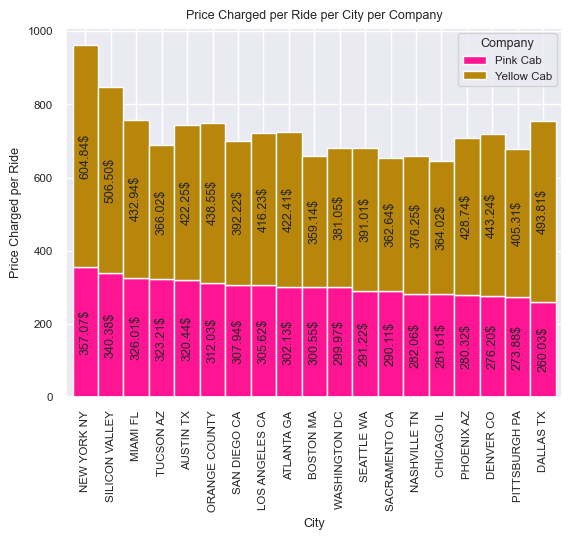

In [ ]:
plt.figure(figsize=(20, 10))
ax = df__.plot(kind='bar', stacked=True, color=colors, width=1)
plt.xlabel('City')
plt.ylabel('Price Charged per Ride')
plt.title('Price Charged per Ride per City per Company')

# add values to the bars
for container in ax.containers:
    ax.bar_label(container, label_type='center', rotation=90, fmt='%.2f$')

plt.show()

### Cost of Trip per Ride

In [ ]:
df__ = df_.pivot_table(index = 'City', columns= 'Company', values='Cost of Trip per Ride')
df__ = df__.sort_values('Pink Cab', ascending= False)
df__.head()

Company,Pink Cab,Yellow Cab
City,,
SILICON VALLEY,250.766650,299.711120
BOSTON MA,250.030529,297.656812
SEATTLE WA,249.942297,297.585765
TUCSON AZ,249.008830,294.488966
LOS ANGELES CA,248.955132,299.574768


<Figure size 2000x1000 with 0 Axes>

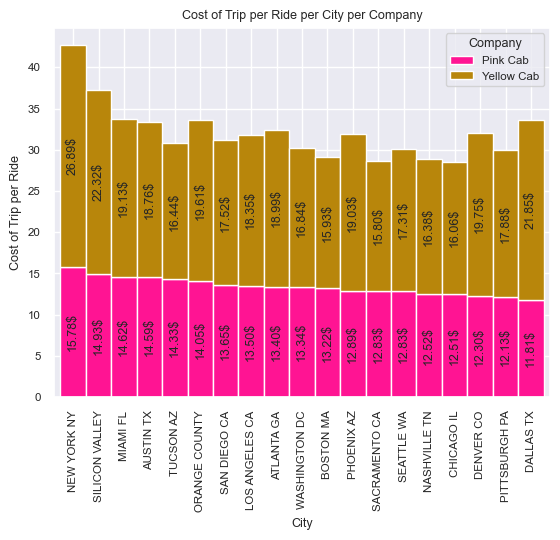

In [ ]:
plt.figure(figsize=(20, 10))
ax = df__.plot(kind='bar', stacked=True, color=colors, width=1)
plt.xlabel('City')
plt.ylabel('Cost of Trip per Ride')
plt.title('Cost of Trip per Ride per City per Company')

# add values to the bars
for container in ax.containers:
    ax.bar_label(container, label_type='center', rotation=90, fmt='%.2f$')

plt.show()

### Price Charged per KM

In [ ]:
df__ = df_.pivot_table(index = 'City', columns= 'Company', values='Price Charged per KM')
df__ = df__.sort_values('Pink Cab', ascending= False)
df__.head()

Company,Pink Cab,Yellow Cab
City,,
NEW YORK NY,15.784085,26.886209
SILICON VALLEY,14.934162,22.316301
MIAMI FL,14.619166,19.126718
AUSTIN TX,14.585667,18.755916
TUCSON AZ,14.328805,16.437309


<Figure size 2000x1000 with 0 Axes>

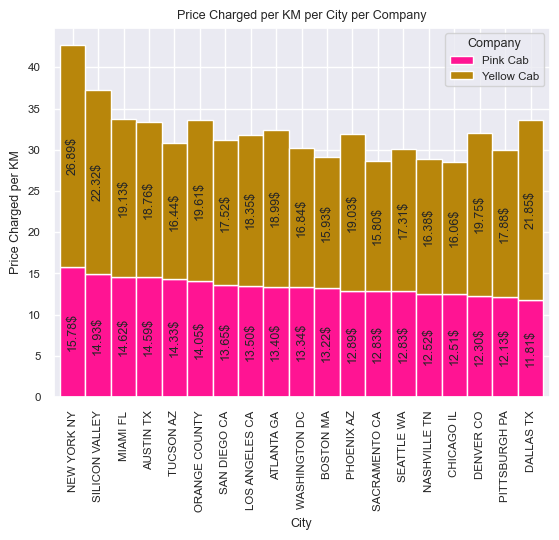

In [ ]:
plt.figure(figsize=(20, 10))
ax = df__.plot(kind='bar', stacked=True, color=colors, width=1)
plt.xlabel('City')
plt.ylabel('Price Charged per KM')
plt.title('Price Charged per KM per City per Company')

# add values to the bars
for container in ax.containers:
    ax.bar_label(container, label_type='center', rotation=90, fmt='%.2f$')

plt.show()

### Cost of Trip per KM

In [ ]:
df__ = df_.pivot_table(index = 'City', columns= 'Company', values='Cost of Trip per KM')
df__ = df__.sort_values('Pink Cab', ascending= False)
df__.head()

Company,Pink Cab,Yellow Cab
City,,
TUCSON AZ,11.039138,13.225042
PITTSBURGH PA,11.017579,13.120824
SEATTLE WA,11.013521,13.176967
ORANGE COUNTY,11.012120,13.179905
WASHINGTON DC,11.009052,13.200423


<Figure size 2000x1000 with 0 Axes>

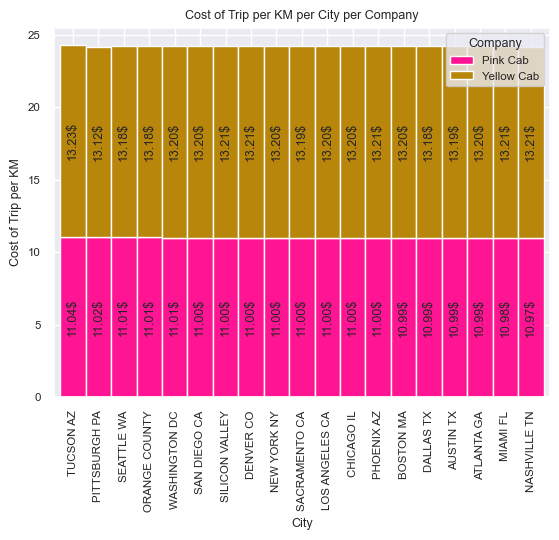

In [ ]:
plt.figure(figsize=(20, 10))
ax = df__.plot(kind='bar', stacked=True, color=colors, width=1)
plt.xlabel('City')
plt.ylabel('Cost of Trip per KM')
plt.title('Cost of Trip per KM per City per Company')

# add values to the bars
for container in ax.containers:
    ax.bar_label(container, label_type='center', rotation=90, fmt='%.2f$')

plt.show()

### cities with max users

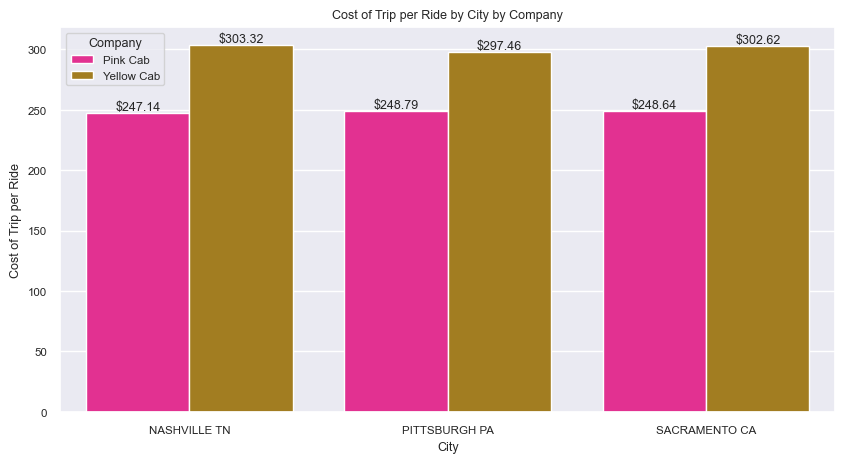

In [ ]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(df_, x = 'City', y = 'Cost of Trip per Ride', hue = 'Company', dodge = True, palette = colors)
plt.xlabel('City')
plt.ylabel('Cost of Trip per Ride')
plt.title('Cost of Trip per Ride by City by Company')

# add values to the bars
for container in ax.containers:
    ax.bar_label(container, fmt = '$%.2f')

plt.show()

# Mode of payment

In [ ]:
df_ = df.groupby(['Company', 'Payment_Mode'])['Users'].count().reset_index()
df_ = df_.rename(columns = {'Users' : 'Rides'})
df_.head()

,Company,Payment_Mode,Rides
0,Pink Cab,Card,50719
1,Pink Cab,Cash,33992
2,Yellow Cab,Card,164785
3,Yellow Cab,Cash,109896


In [ ]:
pink_rides = df_[df_['Company'] == 'Pink Cab']['Rides'].sum()
df_[df_['Company'] == 'Pink Cab']['Rides'] / pink_rides

0    0.59873
1    0.40127
Name: Rides, dtype: float64

In [ ]:
yellow_rides = df_[df_['Company'] == 'Yellow Cab']['Rides'].sum()
df_[df_['Company'] == 'Yellow Cab']['Rides'] / yellow_rides

2    0.599914
3    0.400086
Name: Rides, dtype: float64

# Gender

In [ ]:
df_ = df.groupby(['Company', 'Gender'])['Users'].count().reset_index()
df_ = df_.rename(columns = {'Users' : 'Rides'})
df_.head()

,Company,Gender,Rides
0,Pink Cab,Female,37480
1,Pink Cab,Male,47231
2,Yellow Cab,Female,116000
3,Yellow Cab,Male,158681


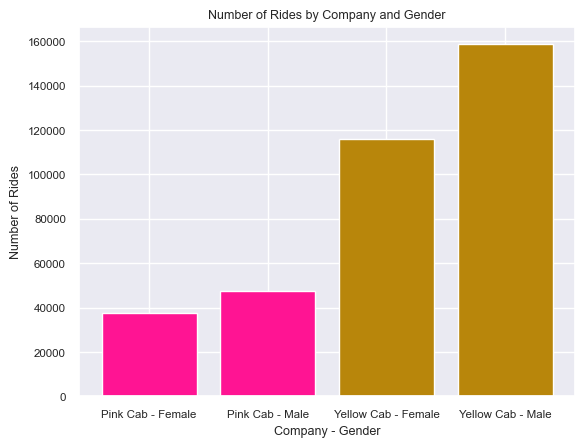

In [ ]:
# Group the data by Company and Gender
# grouped_data = df_.groupby(['Company', 'Gender']).sum().reset_index()

# Create a bar plot
# Create a bar plot
for i, row in df_.iterrows():
    plt.bar(row['Company'] + ' - ' + row['Gender'], row['Rides'], color=colors[row['Company']])

plt.title('Number of Rides by Company and Gender')
plt.xlabel('Company - Gender')
plt.ylabel('Number of Rides')

plt.show()

plt.show()

In [ ]:
pink_rides = df_[df_['Company'] == 'Pink Cab']['Rides'].sum()
df_[df_['Company'] == 'Pink Cab']['Rides'] / pink_rides

0    0.442445
1    0.557555
Name: Rides, dtype: float64

In [ ]:
yellow_rides = df_[df_['Company'] == 'Yellow Cab']['Rides'].sum()
df_[df_['Company'] == 'Yellow Cab']['Rides'] / yellow_rides

2    0.422308
3    0.577692
Name: Rides, dtype: float64

# Age

## age interval initialization

In [141]:
df['Age'].describe()

count    359392.000000
mean         35.336705
std          12.594234
min          18.000000
25%          25.000000
50%          33.000000
75%          42.000000
max          65.000000
Name: Age, dtype: float64

In [155]:
bins = [17, 25, 33, 42, float('inf')]
labels = ['18-25', '26-33', '34-42', '42+']

In [156]:
df['Age_Interval'] = pd.cut(df['Age'], bins = bins, labels = labels)

In [157]:
df.head()

,City,Population,Users,Transaction ID,Date of Travel,Company,KM Travelled,Price Charged,Cost of Trip,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,Age_Interval
0,NEW YORK NY,8405837,302149,10000139,1/8/2016,Pink Cab,17.85,242.90,198.135,2416,Male,28,21399,Cash,26-33
1,NEW YORK NY,8405837,302149,10000140,1/9/2016,Pink Cab,25.30,407.21,255.530,2060,Male,18,8149,Card,18-25
2,NEW YORK NY,8405837,302149,10000141,1/6/2016,Pink Cab,16.32,236.41,186.048,1451,Male,35,23989,Card,34-42
3,NEW YORK NY,8405837,302149,10000142,1/4/2016,Pink Cab,12.43,194.61,144.188,1609,Male,30,23036,Card,26-33
4,NEW YORK NY,8405837,302149,10000143,1/9/2016,Pink Cab,29.70,434.57,350.460,2927,Male,33,14520,Cash,26-33


## rides

In [158]:
df_ = df.groupby(['Age_Interval', 'Company'])['Users'].count().reset_index()
df_ = df_.rename(columns = {'Users' : 'Rides'})
df_.head()

,Age_Interval,Company,Rides
0,18-25,Pink Cab,22120
1,18-25,Yellow Cab,71224
2,26-33,Pink Cab,21469
3,26-33,Yellow Cab,69565
4,34-42,Pink Cab,20254


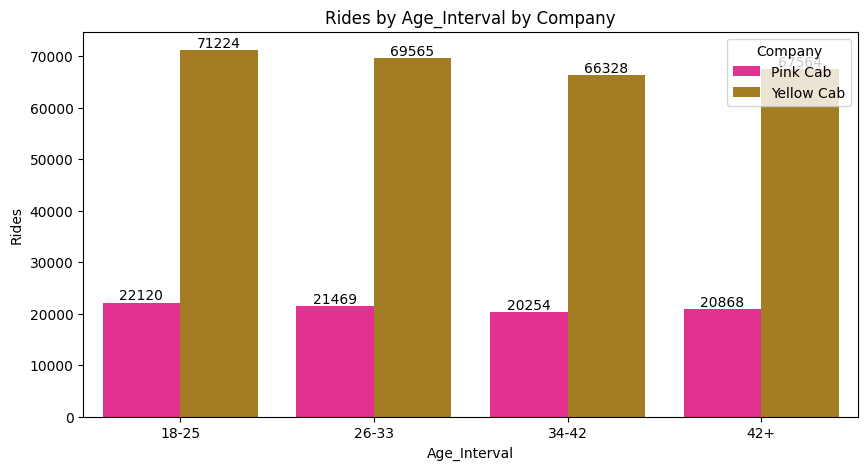

In [159]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(df_, x = 'Age_Interval', y = 'Rides', hue = 'Company', dodge = True, palette = colors)
plt.xlabel('Age_Interval')
plt.ylabel('Rides')
plt.title('Rides by Age_Interval by Company')

# add values to the bars
for container in ax.containers:
    ax.bar_label(container)

plt.show()

In [160]:
df__ = df_.groupby(['Age_Interval'])['Rides'].sum().reset_index()
df__ = df__.rename(columns= {'Rides':'TotalRides'})
df_ = df_.merge(df__, on = ['Age_Interval'])
df_['Share %'] = df_['Rides'] / df_['TotalRides']
df_

,Age_Interval,Company,Rides,TotalRides,Share %
0,18-25,Pink Cab,22120,93344,0.236973
1,18-25,Yellow Cab,71224,93344,0.763027
2,26-33,Pink Cab,21469,91034,0.235835
3,26-33,Yellow Cab,69565,91034,0.764165
4,34-42,Pink Cab,20254,86582,0.233929
5,34-42,Yellow Cab,66328,86582,0.766071
6,42+,Pink Cab,20868,88432,0.235978
7,42+,Yellow Cab,67564,88432,0.764022


In [161]:
df_ = df_.set_index('Age_Interval')
df_ = df_.pivot_table(index = 'Age_Interval', columns= 'Company', values='Share %')
df_

Company,Pink Cab,Yellow Cab
Age_Interval,,
18-25,0.236973,0.763027
26-33,0.235835,0.764165
34-42,0.233929,0.766071
42+,0.235978,0.764022


<Figure size 2000x1000 with 0 Axes>

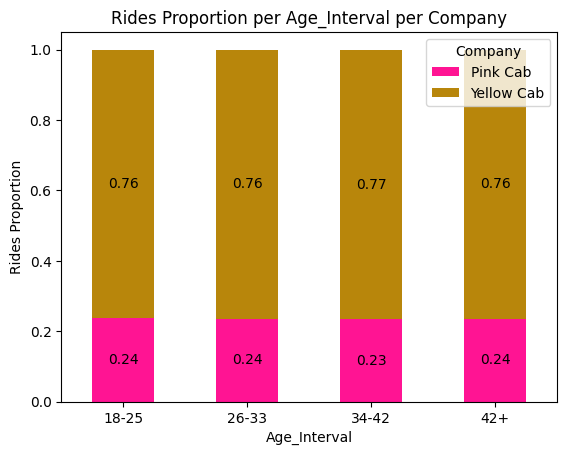

In [162]:
plt.figure(figsize=(20, 10))
ax = df_.plot(kind='bar', stacked=True, color=colors, width=0.5)
plt.xlabel('Age_Interval')
plt.xticks(rotation = 0)
plt.ylabel('Rides Proportion')
plt.title('Rides Proportion per Age_Interval per Company')

# add values to the bars
for container in ax.containers:
    ax.bar_label(container, label_type='center', fmt = '%.2f')

plt.show()

## users

In [163]:
df_ = df.groupby(['Age_Interval', 'Company'])['Customer ID'].nunique().reset_index()
df_ = df_.rename(columns = {'Customer ID' : 'Users'})
df_.head()

,Age_Interval,Company,Users
0,18-25,Pink Cab,8354
1,18-25,Yellow Cab,10287
2,26-33,Pink Cab,8142
3,26-33,Yellow Cab,10113
4,34-42,Pink Cab,7884


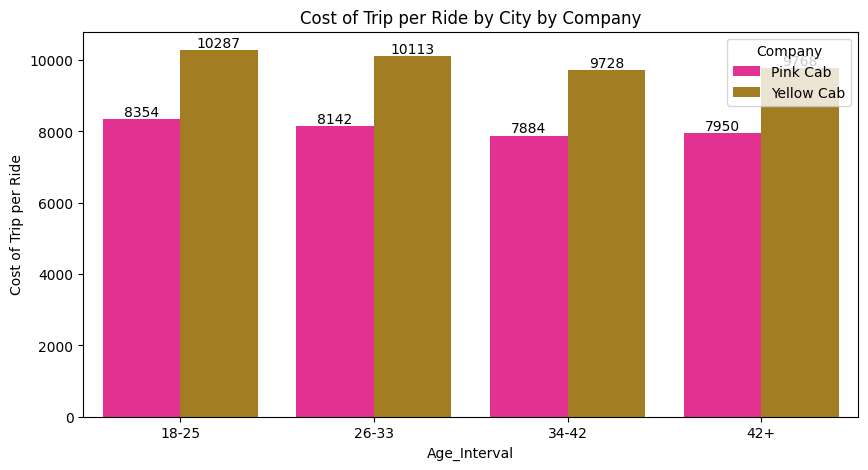

In [164]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(df_, x = 'Age_Interval', y = 'Users', hue = 'Company', dodge = True, palette = colors)
plt.xlabel('Age_Interval')
plt.ylabel('Cost of Trip per Ride')
plt.title('Cost of Trip per Ride by City by Company')

# add values to the bars
for container in ax.containers:
    ax.bar_label(container)

plt.show()

In [165]:
df__ = df_.groupby(['Age_Interval'])['Users'].sum().reset_index()
df__ = df__.rename(columns= {'Users':'TotalUsers'})
df_ = df_.merge(df__, on = ['Age_Interval'])
df_['Share %'] = df_['Users'] / df_['TotalUsers']
df_

,Age_Interval,Company,Users,TotalUsers,Share %
0,18-25,Pink Cab,8354,18641,0.448152
1,18-25,Yellow Cab,10287,18641,0.551848
2,26-33,Pink Cab,8142,18255,0.446015
3,26-33,Yellow Cab,10113,18255,0.553985
4,34-42,Pink Cab,7884,17612,0.447649
5,34-42,Yellow Cab,9728,17612,0.552351
6,42+,Pink Cab,7950,17718,0.448696
7,42+,Yellow Cab,9768,17718,0.551304


In [166]:
df_ = df_.set_index('Age_Interval')
df_ = df_.pivot_table(index = 'Age_Interval', columns= 'Company', values='Share %')
df_

Company,Pink Cab,Yellow Cab
Age_Interval,,
18-25,0.448152,0.551848
26-33,0.446015,0.553985
34-42,0.447649,0.552351
42+,0.448696,0.551304


<Figure size 2000x1000 with 0 Axes>

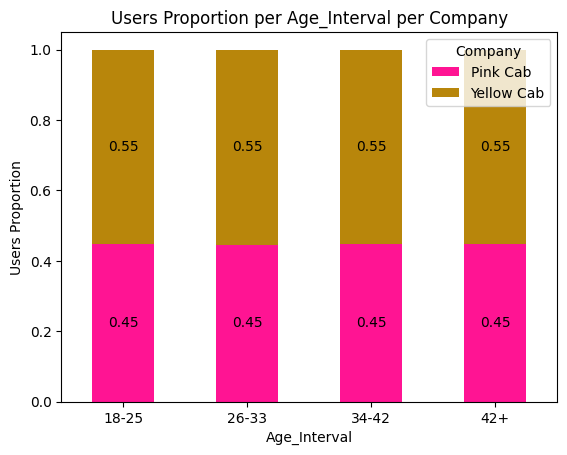

In [167]:
plt.figure(figsize=(20, 10))
ax = df_.plot(kind='bar', stacked=True, color=colors, width=0.5)
plt.xlabel('Age_Interval')
plt.xticks(rotation = 0)
plt.ylabel('Users Proportion')
plt.title('Users Proportion per Age_Interval per Company')

# add values to the bars
for container in ax.containers:
    ax.bar_label(container, label_type='center', fmt = '%.2f')

plt.show()

## profit

In [189]:
df.head()

,City,Population,Users,Transaction ID,Date of Travel,Company,KM Travelled,Price Charged,Cost of Trip,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,Age_Interval,Income_Interval
0,NEW YORK NY,8405837,302149,10000139,1/8/2016,Pink Cab,17.85,242.90,198.135,2416,Male,28,21399,Cash,26-33,>21000
1,NEW YORK NY,8405837,302149,10000140,1/9/2016,Pink Cab,25.30,407.21,255.530,2060,Male,18,8149,Card,18-25,<8500
2,NEW YORK NY,8405837,302149,10000141,1/6/2016,Pink Cab,16.32,236.41,186.048,1451,Male,35,23989,Card,34-42,>21000
3,NEW YORK NY,8405837,302149,10000142,1/4/2016,Pink Cab,12.43,194.61,144.188,1609,Male,30,23036,Card,26-33,>21000
4,NEW YORK NY,8405837,302149,10000143,1/9/2016,Pink Cab,29.70,434.57,350.460,2927,Male,33,14520,Cash,26-33,8500-15000


# Income

## income level initialization

In [169]:
df['Income (USD/Month)'].describe()

count    359392.000000
mean      15048.822937
std        7969.409482
min        2000.000000
25%        8424.000000
50%       14685.000000
75%       21035.000000
max       35000.000000
Name: Income (USD/Month), dtype: float64

In [173]:
bins = [1999, 8499, 14999, 21000, float('inf')]
labels = ['<8500', '8500-15000', '15000-21000', '>21000']
df['Income_Interval'] = pd.cut(df['Income (USD/Month)'], bins = bins, labels = labels)

## users

In [184]:
df_ = df.groupby(['Income_Interval', 'Company'])['Customer ID'].nunique().reset_index()
df_ = df_.rename(columns= {'Customer ID':'Users'})
df_

,Income_Interval,Company,Users
0,<8500,Pink Cab,8305
1,<8500,Yellow Cab,10320
2,8500-15000,Pink Cab,8285
3,8500-15000,Yellow Cab,10216
4,15000-21000,Pink Cab,7572
5,15000-21000,Yellow Cab,9381
6,>21000,Pink Cab,8168
7,>21000,Yellow Cab,9979


In [185]:
df__ = df_.groupby(['Income_Interval'])['Users'].sum().reset_index()
df__ = df__.rename(columns = {'Users':'TotalUsers'})
df_ = df_.merge(df__, on = 'Income_Interval')
df_['Share %'] = df_['Users'] / df_['TotalUsers']
df_

,Income_Interval,Company,Users,TotalUsers,Share %
0,<8500,Pink Cab,8305,18625,0.445906
1,<8500,Yellow Cab,10320,18625,0.554094
2,8500-15000,Pink Cab,8285,18501,0.447814
3,8500-15000,Yellow Cab,10216,18501,0.552186
4,15000-21000,Pink Cab,7572,16953,0.446647
5,15000-21000,Yellow Cab,9381,16953,0.553353
6,>21000,Pink Cab,8168,18147,0.450102
7,>21000,Yellow Cab,9979,18147,0.549898


In [186]:
df_ = df_.set_index('Income_Interval')
df_ = df_.pivot_table(index = 'Income_Interval', columns= 'Company', values = 'Share %')
df_

Company,Pink Cab,Yellow Cab
Income_Interval,,
<8500,0.445906,0.554094
8500-15000,0.447814,0.552186
15000-21000,0.446647,0.553353
>21000,0.450102,0.549898


<Figure size 2000x1000 with 0 Axes>

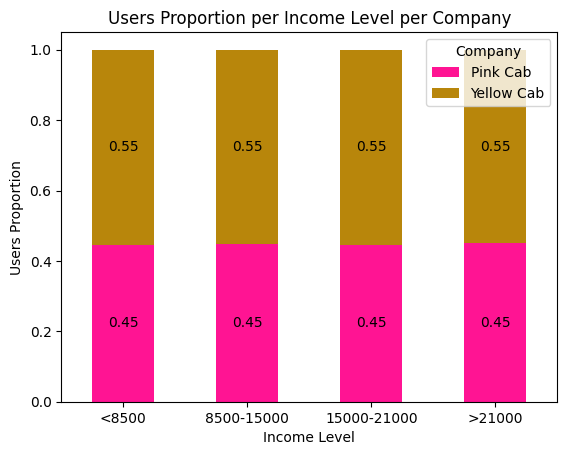

In [188]:
plt.figure(figsize=(20, 10))
ax = df_.plot(kind='bar', stacked=True, color=colors, width=0.5)
plt.xlabel('Income Level')
plt.xticks(rotation = 0)
plt.ylabel('Users Proportion')
plt.title('Users Proportion per Income Level per Company')

# add values to the bars
for container in ax.containers:
    ax.bar_label(container, label_type='center', fmt = '%.3f')

plt.show()

## profit

In [206]:
df

,City,Population,Users,Transaction ID,Date of Travel,Company,KM Travelled,Price Charged,Cost of Trip,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,Age_Interval,Income_Interval,Profit
0,NEW YORK NY,8405837,302149,10000139,1/8/2016,Pink Cab,17.85,242.90,198.1350,2416,Male,28,21399,Cash,26-33,>21000,44.7650
1,NEW YORK NY,8405837,302149,10000140,1/9/2016,Pink Cab,25.30,407.21,255.5300,2060,Male,18,8149,Card,18-25,<8500,151.6800
2,NEW YORK NY,8405837,302149,10000141,1/6/2016,Pink Cab,16.32,236.41,186.0480,1451,Male,35,23989,Card,34-42,>21000,50.3620
3,NEW YORK NY,8405837,302149,10000142,1/4/2016,Pink Cab,12.43,194.61,144.1880,1609,Male,30,23036,Card,26-33,>21000,50.4220
4,NEW YORK NY,8405837,302149,10000143,1/9/2016,Pink Cab,29.70,434.57,350.4600,2927,Male,33,14520,Cash,26-33,8500-15000,84.1100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,BOSTON MA,248968,80021,10437872,1/4/2018,Yellow Cab,1.96,26.23,25.1664,59926,Female,59,4172,Card,42+,<8500,1.0636
359388,BOSTON MA,248968,80021,10437873,1/5/2018,Yellow Cab,23.52,380.22,338.6880,57905,Male,60,31941,Card,42+,>21000,41.5320
359389,BOSTON MA,248968,80021,10437874,1/6/2018,Yellow Cab,29.10,393.33,391.1040,57906,Male,37,26410,Cash,34-42,>21000,2.2260
359390,BOSTON MA,248968,80021,10437875,1/8/2018,Yellow Cab,3.33,42.31,46.7532,59259,Male,51,15360,Cash,42+,15000-21000,-4.4432


In [207]:
df_ = df.groupby(['Income_Interval', 'Company'])['Profit'].sum().reset_index()
df_['Profit'] /= 10 ** 6
df_

,Income_Interval,Company,Profit
0,<8500,Pink Cab,1.347323
1,<8500,Yellow Cab,10.931980
2,8500-15000,Pink Cab,1.339524
3,8500-15000,Yellow Cab,11.326802
4,15000-21000,Pink Cab,1.265465
5,15000-21000,Yellow Cab,10.700071
6,>21000,Pink Cab,1.355016
7,>21000,Yellow Cab,11.061521


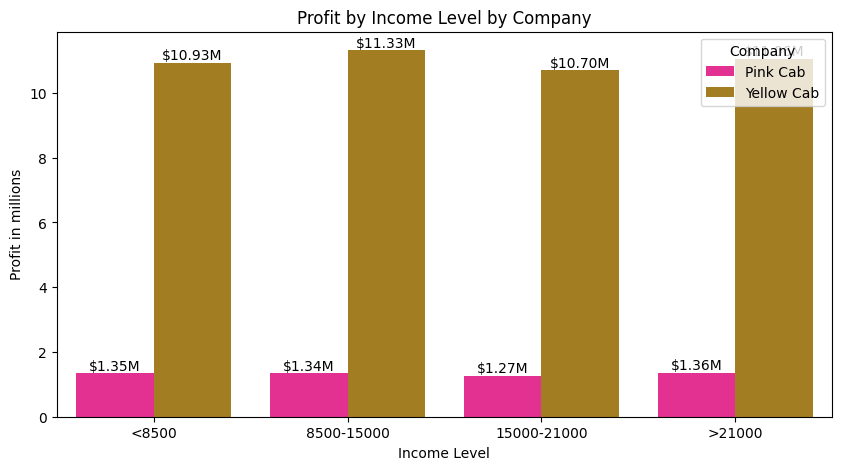

In [208]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(df_, x = 'Income_Interval', y = 'Profit', hue = 'Company', dodge = True, palette = colors)
plt.xlabel('Income Level')
plt.ylabel('Profit in millions')
plt.title('Profit by Income Level by Company')

# add values to the bars
for container in ax.containers:
    ax.bar_label(container, fmt = '$%.2fM')

plt.show()

In [209]:
df__ = df_.groupby(['Income_Interval'])['Profit'].sum().reset_index()
df__ = df__.rename(columns = {'Profit':'TotalProfit'})
df_ = df_.merge(df__, on = 'Income_Interval')
df_['Share %'] = df_['Profit'] / df_['TotalProfit']
df_

,Income_Interval,Company,Profit,TotalProfit,Share %
0,<8500,Pink Cab,1.347323,12.279303,0.109723
1,<8500,Yellow Cab,10.931980,12.279303,0.890277
2,8500-15000,Pink Cab,1.339524,12.666325,0.105755
3,8500-15000,Yellow Cab,11.326802,12.666325,0.894245
4,15000-21000,Pink Cab,1.265465,11.965536,0.105759
5,15000-21000,Yellow Cab,10.700071,11.965536,0.894241
6,>21000,Pink Cab,1.355016,12.416537,0.109130
7,>21000,Yellow Cab,11.061521,12.416537,0.890870


In [211]:
df_ = df_.set_index('Income_Interval')
df_ = df_.pivot_table(index = 'Income_Interval', columns= 'Company', values='Share %')
df_

Company,Pink Cab,Yellow Cab
Income_Interval,,
<8500,0.109723,0.890277
8500-15000,0.105755,0.894245
15000-21000,0.105759,0.894241
>21000,0.109130,0.890870


<Figure size 2000x1000 with 0 Axes>

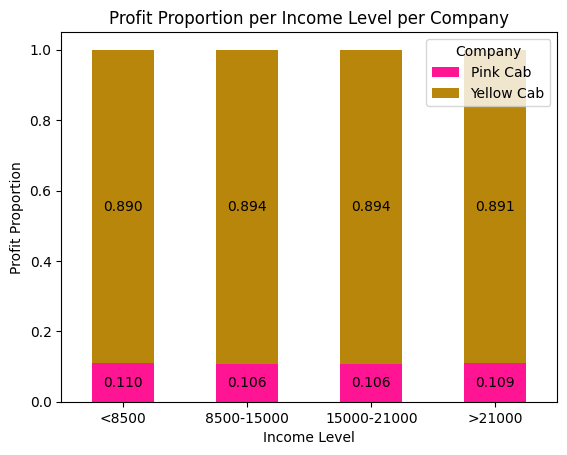

In [213]:
plt.figure(figsize=(20, 10))
ax = df_.plot(kind='bar', stacked=True, color=colors, width=0.5)
plt.xlabel('Income Level')
plt.xticks(rotation = 0)
plt.ylabel('Profit Proportion')
plt.title('Profit Proportion per Income Level per Company')

# add values to the bars
for container in ax.containers:
    ax.bar_label(container, label_type='center', fmt = '%.3f')

plt.show()